### HW10 assignment 2 
### Author: Jianghao Zhu PUI CUSP 2016

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

### Loading Census Tract Shape File

In [2]:
from geopandas import GeoDataFrame
shape_path = 'Data/CT_Shape/ct_shape.shp'
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index = ct_shape.BoroCT2010

In [3]:
ct_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."


### Coordinate systems, projections, and transformations 

In [6]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326)
NYC_Area = ct_shape.to_crs(epsg=2263).geometry.area.sum() / (2.788*10**7)
print 'Total NYC land area: {:.1f} (mi^2)'.format(NYC_Area)

Total NYC land area: 302.4 (mi^2)


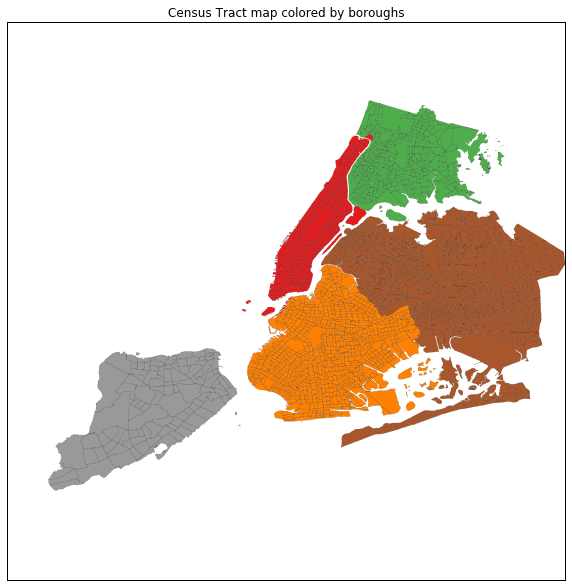

In [8]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode', alpha=1, linewidth=0.5, ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [9]:
ct_data = DataFrame.from_csv('Data/ACS_CT2010.csv')
ct_data.index = ct_data.BoroCT2010.astype(str)

In [10]:
ct_data['SE_T002_002'].head()

BoroCT2010
5000900    23590.33
5012500    16629.33
5013301    62810.20
5019700    16109.98
5002002    10606.82
Name: SE_T002_002, dtype: float64

### Add population density to CT shapefile

In [19]:
ct_shape_pop = ct_shape.join(ct_data[['SE_T002_002']])

In [14]:
# alter: ct_shape_pop = ct_shape.join(ct_data.SE_T002_002)
#        ct_shape_pop = ct_shape.join(ct_data['SE_T002_002'])

In [20]:
ct_shape_pop.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,SE_T002_002
BoroCT2010,,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,23590.33
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,16629.33
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,62810.20
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...,16109.98
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,...",10606.82


In [17]:
ct_shape_pop.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,SE_T002_002
BoroCT2010,,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,23590.33
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,16629.33
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,62810.20
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...,16109.98
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,...",10606.82


### Visualize the popolation density for 2010

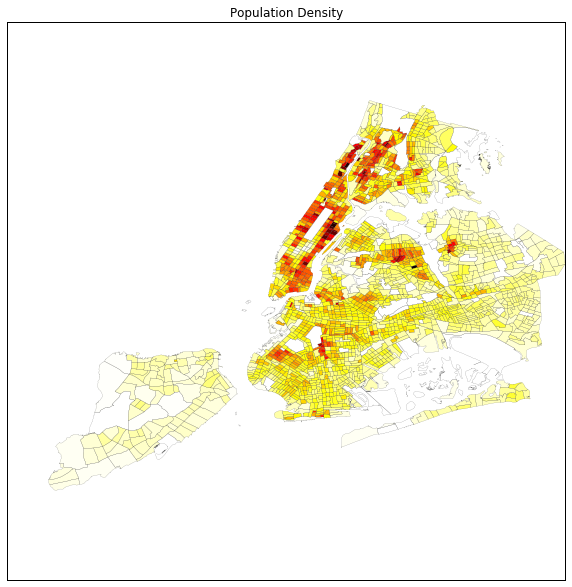

In [21]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002', cmap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Population Density")

### Explore CitiBike data

### Load CitiBike data

In [23]:
df_bike_monthly = DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')

In [24]:
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_bike_monthly.index.month

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6], dtype=int32)

In [38]:
df_bike_summer = df_bike_monthly[(df_bike_monthly.index.month > 6) & \
                                 (df_bike_monthly.index.month < 10)]

In [39]:
df_bike_summer.max().max()

14923

In [40]:
df_bike_winter.max().max()

8843

In [41]:
df_bike_winter = df_bike_monthly[(df_bike_monthly.index.month > 11)\
                                 | (df_bike_monthly.index.month < 3)]

In [48]:
df_bike_summer.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2014-07-31,2252,3216,9825,3509,7014,3224,2195,3732,4042,2268,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,2179,3004,10196,3573,7328,3311,2213,4078,4011,2168,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_bike_winter.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,0
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,1052,1304,4501,1783,2985,2091,779,2108,1636,878,...,0,0,0,0,0,0,0,0,0,0
2015-01-31,833,0,3186,1248,1992,1429,442,1499,1366,619,...,0,0,0,0,0,0,0,0,0,0


In [50]:
plt.subplots?

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 9000)

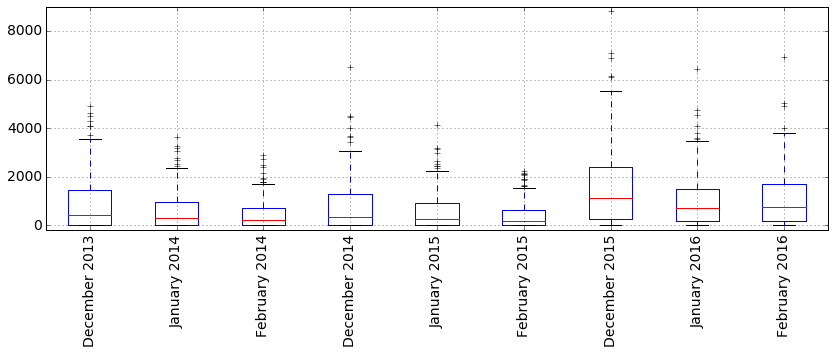

In [49]:
f, ax2 = plt.subplots(1, figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_winter_ = df_bike_winter.copy()
df_bike_winter_.index = df_bike_winter_.index.strftime("%B %Y")
df_bike_winter_.T.boxplot(figsize=(15,7), ax=ax2, rot=90);
ax2.set_ylim([-200, 9000])

In [53]:
plt.subplots?

### Time Series Analysis

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 9000)

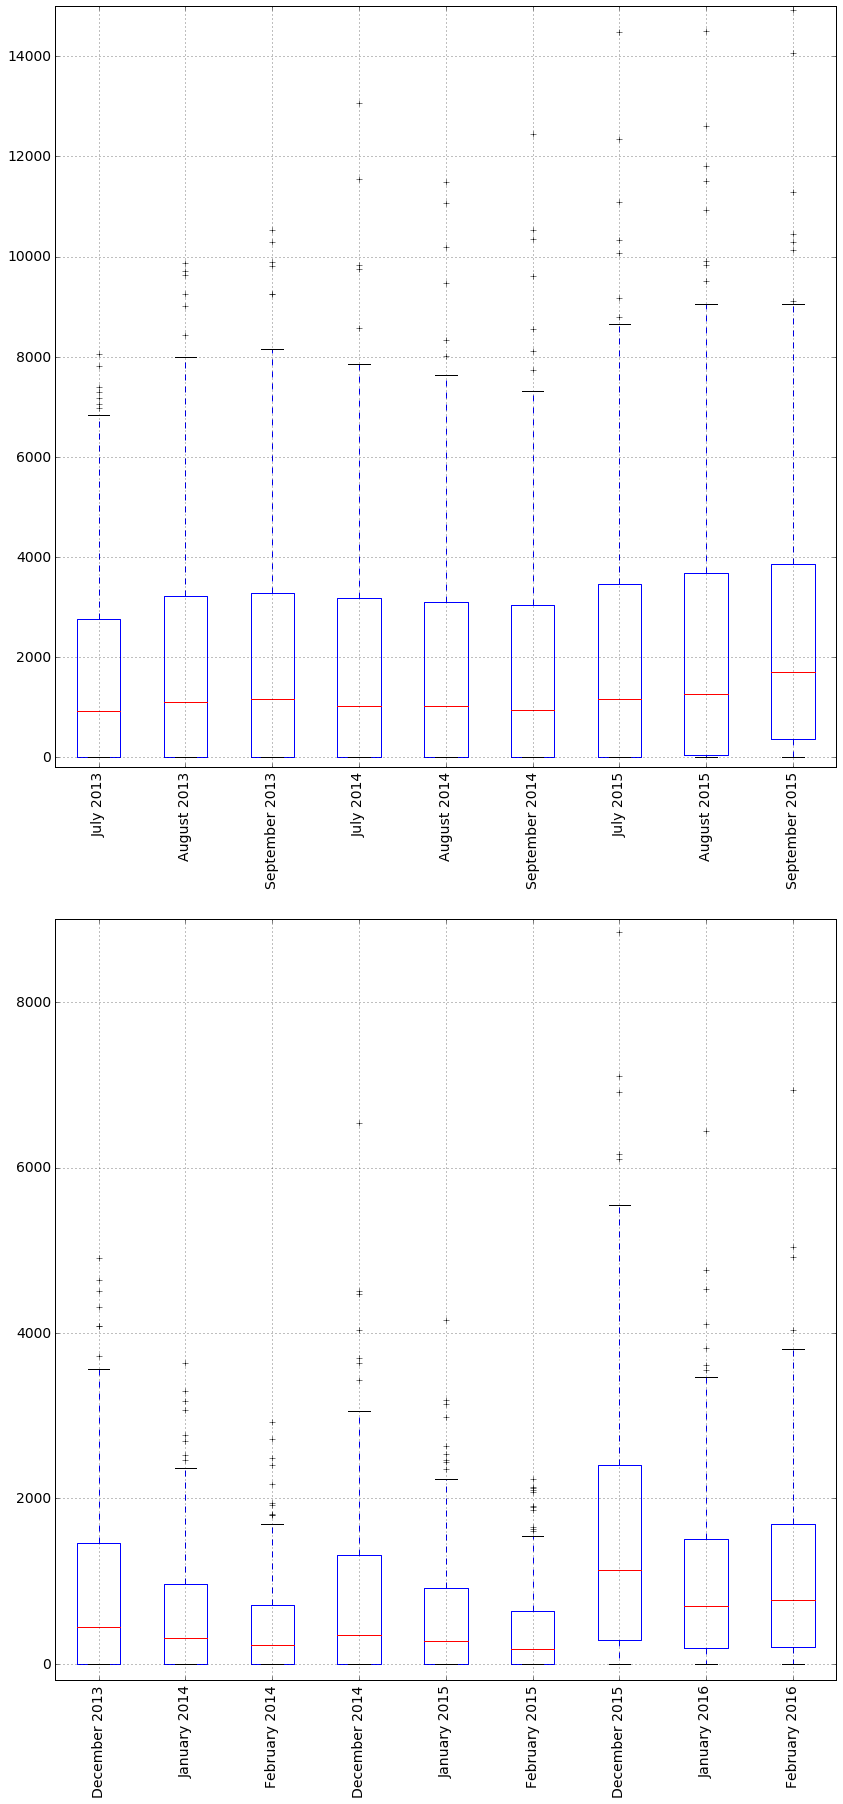

In [58]:
plt.rcParams['font.size'] = 14
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 30))
#create a copy of the df for the viz purposes
df_bike_summer_ = df_bike_summer.copy()
df_bike_summer_.index = df_bike_summer_.index.strftime("%B %Y")
df_bike_summer_.T.boxplot(figsize=(15,7), ax=ax1, rot=90);
ax1.set_ylim([-200, 15000])

#create a copy of the df for the viz purposes
df_bike_winter_ = df_bike_winter.copy()
df_bike_winter_.index = df_bike_winter_.index.strftime("%B %Y")
df_bike_winter_.T.boxplot(figsize=(15,7), ax=ax2, rot=90);
ax2.set_ylim([-200, 9000])


### Seasonal Decomposition

/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


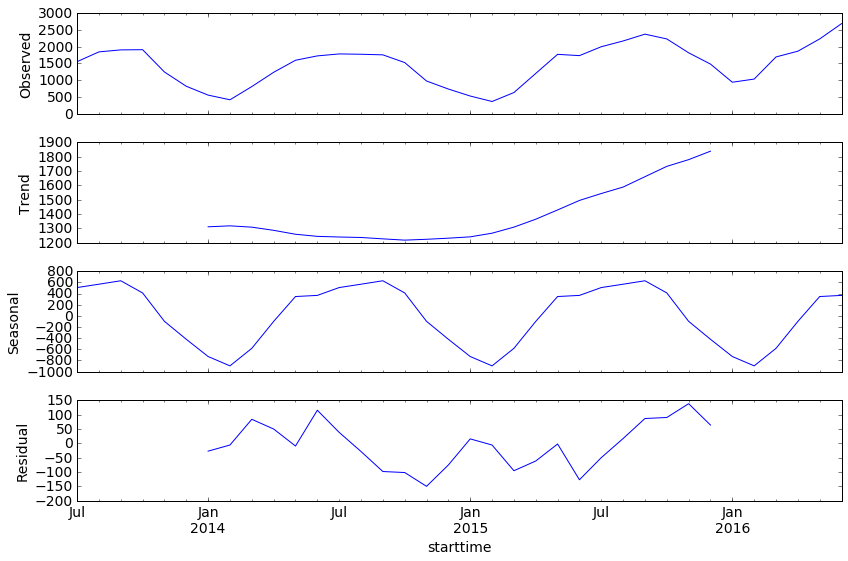

In [81]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

### Seasonal Decomposition require fixed frequency which cause summer or winter breakdown data can not be done with sm.tsa.seasonal_decompose.

 ### Map CitiBike Data to CT level
 
 ### Load CitiBike Station location data

In [97]:
#station_id = pd.read_csv() read csv file in a different way that 
#station id is not regard as index, can look for way to convert station id to index

station_id = DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index = station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from coordinates(Lat & Lon)

In [98]:
import shapely

station_id['lonlat'] = zip(station_id.lon, station_id.lat)
station_id['geometry'] = station_id[['lonlat']].applymap(lambda x: \
                                                        shapely.geometry.Point(x))

In [99]:
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


In [100]:
a = []
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r', "%", str((i+1) * 100. / len(station_id))[:4],
station_id['BoroCT2010'] = a

% 100.


In [101]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [102]:
### Create average monthly rides column from monthly citibike data 
### and add it to the station id which has the geometry
station_id['SummerAve'] = df_bike_summer.sum()
station_id['WinterAve'] = df_bike_winter.sum()

In [103]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,SummerAve,WinterAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,22940,9456
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,35290,11373
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,89624,36543
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,33287,14170
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,62215,21889


In [104]:
len(station_id)

543

In [114]:
tempSummer = station_id[['SummerAve']]
tempWinter = station_id[['WinterAve']]
tempSummer.index = station_id.BoroCT2010
tempWinter.index = station_id.BoroCT2010
ct_shape_SummerAve = ct_shape.join(tempSummer)
ct_shape_WinterAve = ct_shape.join(tempWinter)
ct_shape_SummerAve.fillna(0, inplace=True)
ct_shape_WinterAve.fillna(0, inplace=True)

In [107]:
ct_shape_WinterAve.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,WinterAve
BoroCT2010,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,3670.0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,5705.0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,10509.0


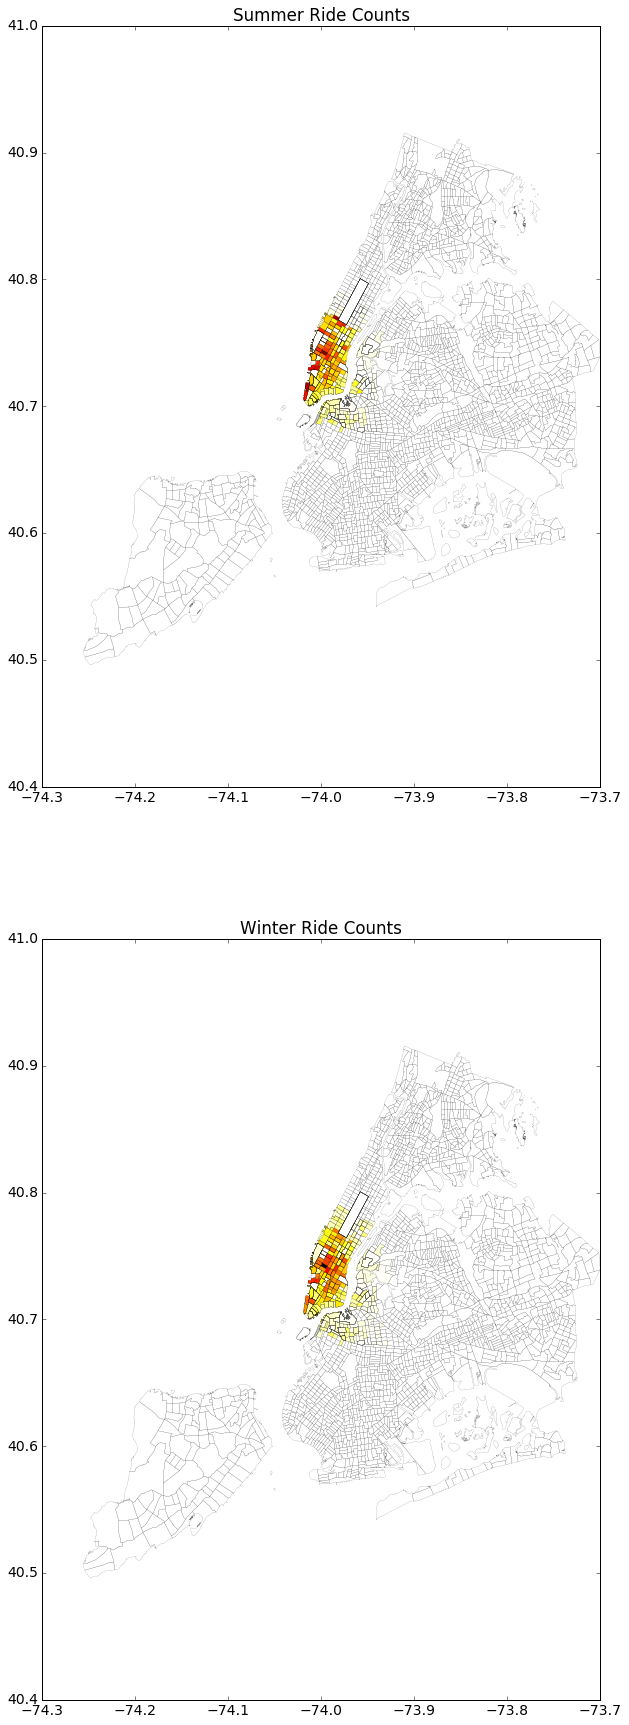

In [109]:
f, (ax_s, ax_w) = plt.subplots(2, 1, figsize=(10, 30))
ct_shape_SummerAve.plot(column='SummerAve', cmap='hot_r', alpha=1, linewidth=0.1, ax=ax_s)
ax_s.set_title("Summer Ride Counts")
ct_shape_WinterAve.plot(column='WinterAve', cmap='hot_r', alpha=1, linewidth=0.1, ax=ax_w)
ax_w.set_title("Winter Ride Counts")

In [110]:
ct_shape_SummerAve_Zoom = (ct_shape_SummerAve[ct_shape_SummerAve.centroid
                                             .apply(lambda c:c.x>-74.1 and c.x<-73.92 and 
                                                   c.y>40.65 and c.y<40.8)])

In [111]:
ct_shape_WinterAve_Zoom = (ct_shape_WinterAve[ct_shape_WinterAve.centroid
                                             .apply(lambda c:c.x>-74.1 and c.x<-73.92 and 
                                                   c.y>40.65 and c.y<40.8)])

In [116]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs in Summer:", len(tempSummer.SummerAve)
print "Number of zoomed CTs in Winter:", len(tempWinter.WinterAve)

Total number of CTs: 2166
Number of zoomed CTs in Summer: 543
Number of zoomed CTs in Winter: 543


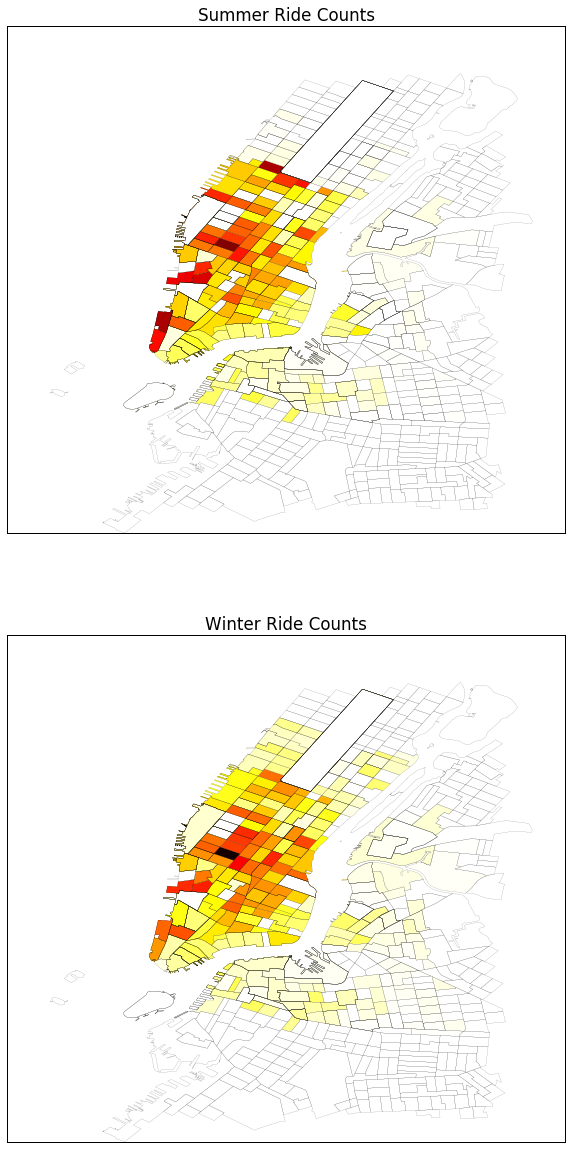

In [118]:
f, (ax_s, ax_w) = plt.subplots(2, 1, figsize=(10, 20))
ax_s.get_xaxis().set_visible(False)
ax_s.get_yaxis().set_visible(False)
ct_shape_SummerAve_Zoom.plot(column='SummerAve', cmap='hot_r', alpha=1, linewidth=0.1, ax=ax_s)
ax_s.set_title('Summer Ride Counts')

ax_w.get_xaxis().set_visible(False)
ax_w.get_yaxis().set_visible(False)
ct_shape_WinterAve_Zoom.plot(column='WinterAve', cmap='hot_r', alpha=1, linewidth=0.1, ax=ax_w)
ax_w.set_title('Winter Ride Counts')

### Export Shapefile CTs in the CitiBike Zone

In [121]:
path_s = 'Output/ct_shape_SummerAve_Zoom.shp'
ct_shape_SummerAve_Zoom.to_file(path_s)
path_w = 'Output/ct_shape_WinterAve_Zoom.shp'
ct_shape_WinterAve_Zoom.to_file(path_w)

### Exploratory Geospatial Analysis

In [122]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [123]:
qW_CT_summer = ps.queen_from_shapefile(path_s)

('Island id: ', [0])


In [124]:
qW_CT_winter = ps.queen_from_shapefile(path_w)

('Island id: ', [0])


In [125]:
qW_CT_summer[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [126]:
qW_CT_winter[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [127]:
qW_CT_summer.cardinalities[10]

9

In [128]:
qW_CT_winter.cardinalities[10]

9

In [129]:
Wmatrix_s, ids_s = qW_CT_summer.full()

In [130]:
Wmatrix_w, ids_w = qW_CT_winter.full()

In [131]:
Wmatrix_s

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [132]:
Wmatrix_w

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [133]:
qW_CT_summer.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


In [134]:
qW_CT_winter.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


In [136]:
SummerRide=ct_shape_SummerAve_Zoom.SummerAve
SummerRideLag=ps.lag_spatial(qW_CT_summer, SummerRide)
WinterRide=ct_shape_WinterAve_Zoom.WinterAve
WinterRideLag=ps.lag_spatial(qW_CT_winter, WinterRide)

In [137]:
SummerRideLagQ10 = ps.Quantiles(SummerRideLag, k=10)
SummerRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               161
    0.000 < x[i] <=   696.661                78
  696.661 < x[i] <=  1803.750                80
 1803.750 < x[i] <=  4727.424                79
 4727.424 < x[i] <=  8447.733                80
 8447.733 < x[i] <= 19124.965                79
19124.965 < x[i] <= 28039.143                80
28039.143 < x[i] <= 32246.317                79
32246.317 < x[i] <= 48706.786                80

In [138]:
WinterRideLagQ10 = ps.Quantiles(WinterRideLag, k=10)
WinterRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    36.286                 2
   36.286 < x[i] <=   603.729                78
  603.729 < x[i] <=  1458.923                80
 1458.923 < x[i] <=  2284.227                79
 2284.227 < x[i] <=  3278.714                80
 3278.714 < x[i] <=  7763.237                79
 7763.237 < x[i] <= 10456.870                80
10456.870 < x[i] <= 12783.385                79
12783.385 < x[i] <= 20551.286                80

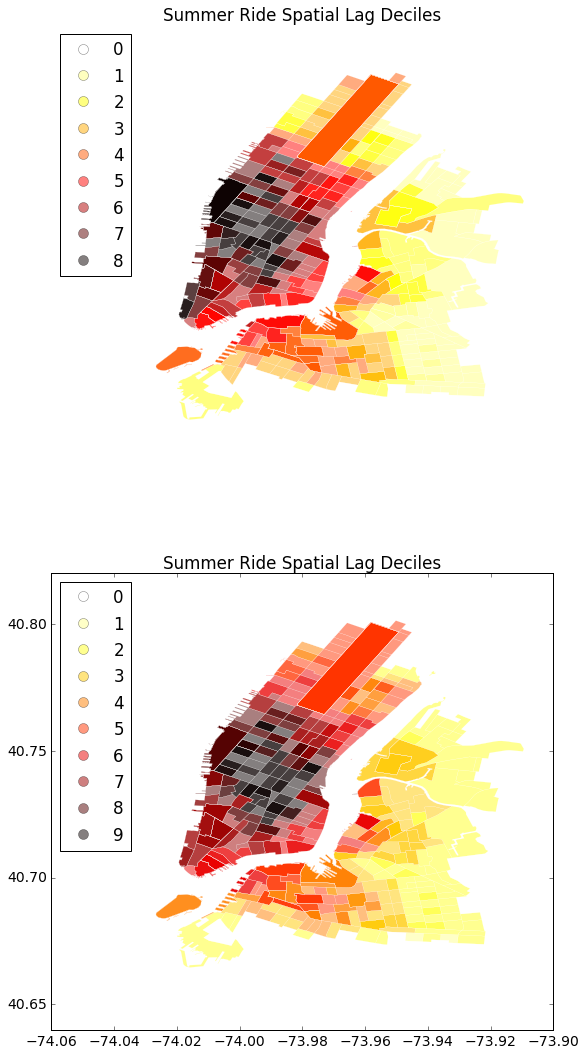

In [139]:
f, (ax_s, ax_w)= plt.subplots(2, 1, figsize=(9, 18))
ct_shape_SummerAve_Zoom.assign(cl=SummerRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax_s, 
        edgecolor='white', legend=True)
ax_s.set_axis_off()
ax_s.set_title("Summer Ride Spatial Lag Deciles")

ct_shape_WinterAve_Zoom.assign(cl=WinterRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax_w, 
        edgecolor='white', legend=True)
ax.set_axis_off()
ax_w.set_title("Summer Ride Spatial Lag Deciles")


### Global Spatial Autocorrelation

In [140]:
b_s, a_s = np.polyfit(SummerRide, SummerRideLag, 1)
b_s, a_s

(0.62926871704725562, 4329.2935721604899)

In [141]:
b_w, a_w = np.polyfit(WinterRide, WinterRideLag, 1)
b_w, a_w

(0.66023249858156818, 1600.8324238675889)

### Moran Scatterplot

In [143]:
ax_s.plot?

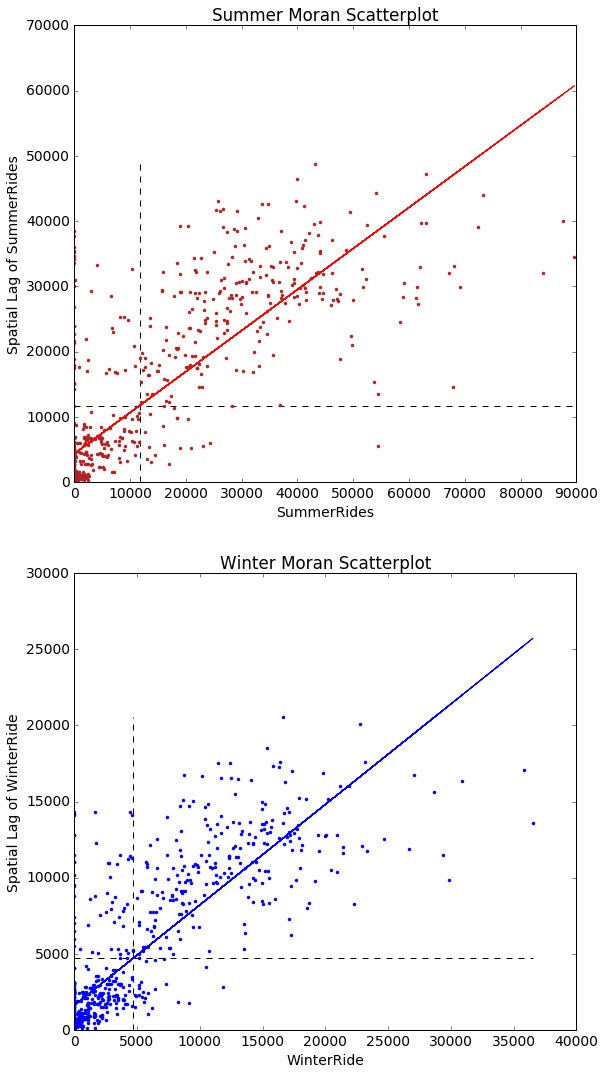

In [146]:
f, (ax_s, ax_w) = plt.subplots(2, 1, figsize=(9, 18))

ax_s.plot(SummerRide, SummerRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
ax_s.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax_s.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax_s.plot(SummerRide, a_s + b_s * SummerRide, 'r')
ax_s.set_title('Summer Moran Scatterplot')
ax_s.set_ylabel('Spatial Lag of SummerRides')
ax_s.set_xlabel('SummerRides')

ax_w.plot(WinterRide, WinterRideLag, '.', color='blue')

 # dashed vert at mean of the last year's PCI
ax_w.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax_w.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax_w.plot(WinterRide, a_w + b_w *WinterRide, 'b')
ax_w.set_title('Winter Moran Scatterplot')
ax_w.set_ylabel('Spatial Lag of WinterRide')
ax_w.set_xlabel('WinterRide')

### Moran's I

In [147]:
I_summerride = ps.Moran(SummerRide, qW_CT_summer)
I_winterride = ps.Moran(WinterRide, qW_CT_winter)

In [148]:
I_summerride.I, I_summerride.p_sim

(0.62946359212848402, 0.001)

Thus, the $I$ statistic of summer is $0.629$ with a very small $p$ value.

In [149]:
I_winterride.I, I_winterride.p_sim

(0.66039156431885593, 0.001)

Thus, the $I$ statistic of winter is $0.660$ with a very small $p$ value.

In [150]:
I_summerride.sim[0:10]

array([-0.00990738, -0.01301944,  0.00362869, -0.00292509, -0.03752193,
        0.00826123, -0.01990413, -0.00247382,  0.00274139, -0.0088891 ])

In [151]:
I_winterride.sim[0:10]

array([-0.00903905,  0.00255739,  0.01255475,  0.00063119, -0.00380696,
       -0.01554193,  0.01591241, -0.02599838,  0.0157611 , -0.00187723])

### KDEplot of simulated points
the vertical line shows the observed values

In [152]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

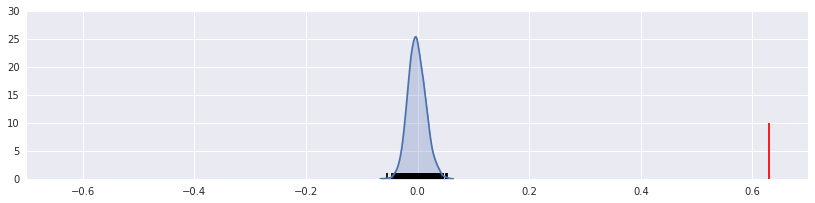

In [153]:
sns.kdeplot(I_summerride.sim, shade=True)
plt.vlines(I_summerride.sim, 0, 1)
plt.vlines(I_summerride.I, 0, 10, 'r')
plt.xlim([-.70, .70])

(-0.7, 0.7)

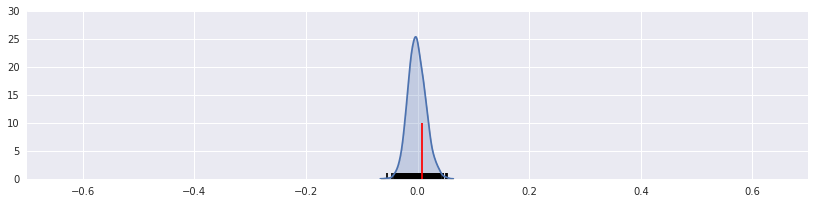

In [154]:
sns.kdeplot(I_summerride.sim, shade=True)
plt.vlines(I_summerride.sim, 0, 1)
plt.vlines(I_summerride.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

(-0.7, 0.7)

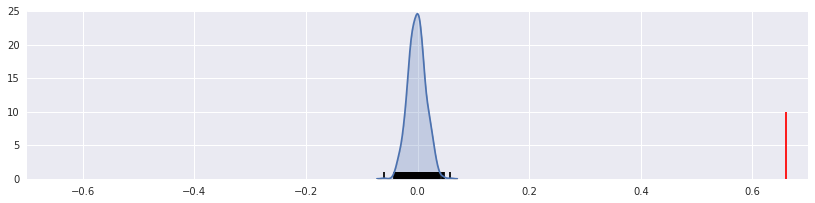

In [156]:
sns.kdeplot(I_winterride.sim, shade=True)
plt.vlines(I_winterride.sim, 0, 1)
plt.vlines(I_winterride.I, 0, 10, 'r')
plt.xlim([-.70, .70])

(-0.7, 0.7)

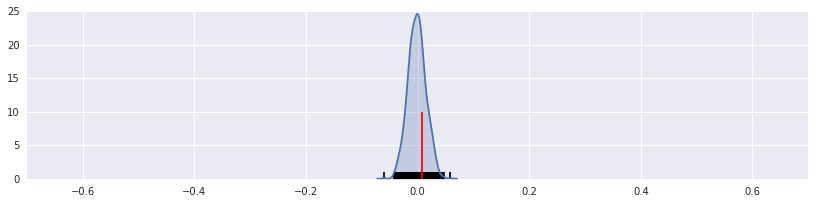

In [157]:
sns.kdeplot(I_winterride.sim, shade=True)
plt.vlines(I_winterride.sim, 0, 1)
plt.vlines(I_winterride.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [159]:
LMo_summerRide = ps.Moran_Local(SummerRide, qW_CT_summer,permutations=999)
LMo_winterRide = ps.Moran_Local(WinterRide, qW_CT_winter,permutations=999)

In [160]:
LMo_summerRide.Is[0:5], LMo_summerRide.p_sim[0:5]

(array([-0.        , -0.23326927,  0.01313014,  0.00869015,  0.0278383 ]),
 array([ 0.001,  0.195,  0.349,  0.314,  0.343]))

In [161]:
LMo_winterRide.Is[0:5], LMo_winterRide.p_sim[0:5]

(array([ -0.00000000e+00,  -3.14119985e-01,  -1.93084894e-04,
         -4.03594530e-03,  -7.97531288e-02]),
 array([ 0.001,  0.127,  0.47 ,  0.492,  0.409]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [176]:
sigs_s = SummerRide[LMo_summerRide.p_sim <= .001]
W_sigs_s = SummerRideLag[LMo_summerRide.p_sim <= .001]
insigs_s = SummerRide[LMo_summerRide.p_sim > .001]
W_insigs_s = SummerRideLag[LMo_summerRide.p_sim > .001]

sigs_w = WinterRide[LMo_summerRide.p_sim <= .001]
W_sigs_w = WinterRideLag[LMo_summerRide.p_sim <= .001]
insigs_w = WinterRide[LMo_summerRide.p_sim > .001]
W_insigs_w = WinterRideLag[LMo_summerRide.p_sim > .001]

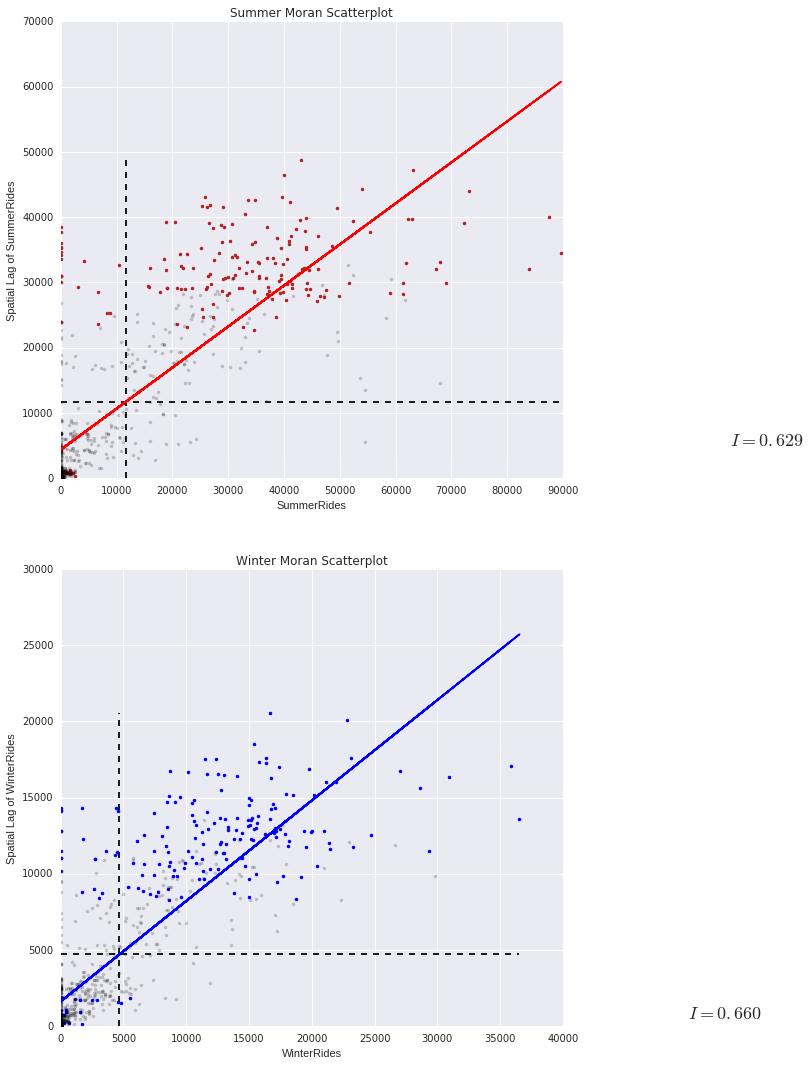

In [177]:
f, (ax_s, ax_w) = plt.subplots(2, 1, figsize=(9, 18))
ax_s.plot(sigs_s, W_sigs_s, '.', color='firebrick')
ax_s.plot(insigs_s, W_insigs_s, '.k', alpha=.2)
ax_s.text(s='$I = %.3f$' % I_summerride.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax_s.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax_s.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax_s.plot(SummerRide, a_s + b_s * SummerRide, 'r')
ax_s.set_title('Summer Moran Scatterplot')
ax_s.set_ylabel('Spatial Lag of SummerRides')
ax_s.set_xlabel('SummerRides')

ax_w.plot(sigs_w, W_sigs_w, '.', color='blue')
ax_w.plot(insigs_w, W_insigs_w, '.k', alpha=.2)
ax_w.text(s='$I = %.3f$' % I_winterride.I, x=50000, y=500, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax_w.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax_w.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax_w.plot(WinterRide, a_w + b_w * WinterRide, 'b')
ax_w.set_title('Winter Moran Scatterplot')
ax_w.set_ylabel('Spatial Lag of WinterRides')
ax_w.set_xlabel('WinterRides')

### Hot and Cold spots

In [178]:
sig_s = LMo_summerRide.p_sim < 0.01
hotspots_s = LMo_summerRide.q==1 * sig_s
coldspots_s = LMo_summerRide.q==3 * sig_s
print "Number of Hotspots in summer:", hotspots_s.sum()
print "Number of Coldspots in summer:", coldspots_s.sum()

Number of Hotspots in summer: 188
Number of Coldspots in summer: 213


In [179]:
sig_w = LMo_winterRide.p_sim < 0.01
hotspots_w = LMo_winterRide.q==1 * sig_w
coldspots_w = LMo_winterRide.q==3 * sig_w
print "Number of Hotspots in winter:", hotspots_w.sum()
print "Number of Coldspots in winter:", coldspots_w.sum()

Number of Hotspots in winter: 193
Number of Coldspots in winter: 211


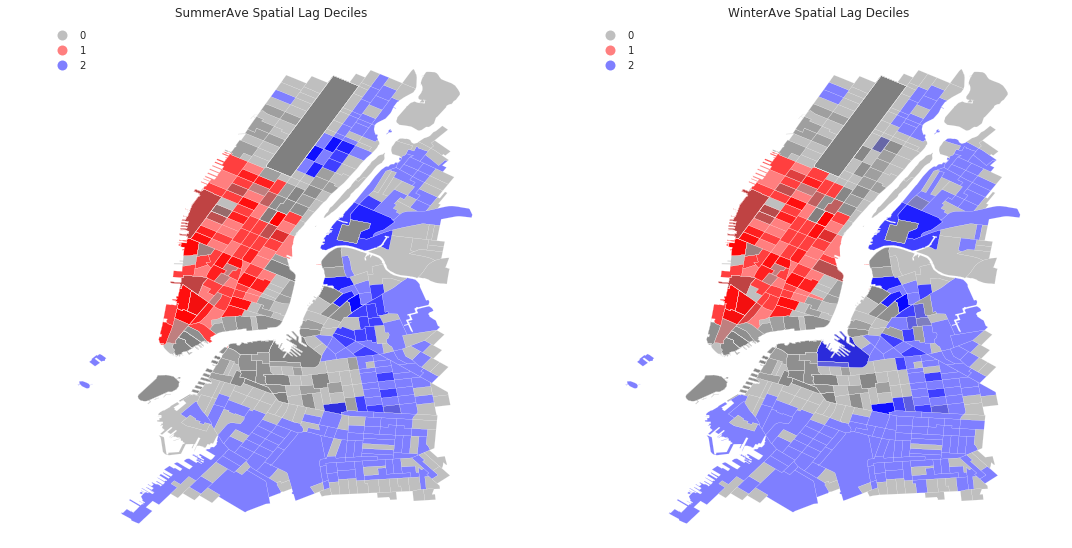

In [181]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_s = hotspots_s * 1 + coldspots_s * 2
hotcold_w = hotspots_w * 1 + coldspots_w * 2

f, (ax_s, ax_w) = plt.subplots(1, 2, figsize=(18, 9))
ct_shape_SummerAve_Zoom.assign(cl=hotcold_s).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax_s, 
        edgecolor='white', legend=True)
ax_s.set_axis_off()
ax_s.set_title("SummerAve Spatial Lag Deciles")

ct_shape_WinterAve_Zoom.assign(cl=hotcold_w).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax_w, 
        edgecolor='white', legend=True)
ax_w.set_axis_off()
ax_w.set_title("WinterAve Spatial Lag Deciles")

In [183]:
ct_shape_SummerAve_Zoom.assign(cl=hotcold_s)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,SummerAve,cl
BoroCT2010,,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0,2
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,13943.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,13131.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,17417.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,2380.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,2158.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,0.0,0
1000600,1000600,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634587,POLYGON ((-73.99022012603876 40.71440493989794...,32105.0,0


In [182]:
ct_shape_WinterAve_Zoom.assign(cl=hotcold_w)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,WinterAve,cl
BoroCT2010,,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0,2
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,3670.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,5705.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,10509.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,0.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,0.0,0
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,0.0,0
1000600,1000600,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634587,POLYGON ((-73.99022012603876 40.71440493989794...,13560.0,0
